# DW_oa_Task01 
## 文件自动化处理&邮件批量处理
## 20210613

# 1 文件自动化处理

## 1.1  读写文件
我们知道，程序运行时，可以用变量来保存运算结果，但如果希望程序运行关闭后，依然可以查看运行后的结果，就需要将数据保存到文件中。简单点，你可以将文件内容理解为一个字符串值，大小可能有几个GB。本节将学习，如何使用python在硬盘上创建、读取和保存文件。

## 1.1.1  文件与文件路径
文件的两个属性：“路径”和“文件名”，路径指明文件在计算机上的位置，文件名是指该位置的文件的名称。比如，我的电脑上，有个名字为Datawhale - 开源发展理论研究.pdf的文件，它的路径在D:\Datawhale。在windows中，路径中的D:\部分是“根文件夹”，Datawhale是文件夹名。注：Windows中文件夹名和文件名不区分大小写的。

在windows上，路径书写是使用倒斜杠'\'作为文件夹之间的分隔符，而在OS X和Linux上，是使用正斜杠'/'作为它们的路径分隔符。通常我们用`os.path.join()`函数来创建文件名称字符串。

In [1]:
import os
os.path.join('datawhale', 'docu')

'datawhale\\docu'

os.path.join()函数：连接两个或更多的路径名组件

1.如果各组件名首字母不包含’/’，则函数会自动加上

2.如果有一个组件是一个绝对路径，则在它之前的所有组件均会被舍弃

3.如果最后一个组件为空，则生成的路径以一个’/’分隔符结尾

我们可以看到返回的是（'Datawhale\\\docu'），有两个斜杠，这是因为有一个斜杠是用来转义的，在OS X或Linux上调用这个函数，这个字符串就会是'Datawhale/docu'。

## 1.1.2  当前工作目录
每个运行在计算机上的程序，都有一个“当前工作目录”。利用`os.getcwd()`函数，可以取得当前工作路径的
字符串，并可以利用`os.chdir()`改变它。

In [2]:
os.getcwd()

'D:\\pythontest\\DW_oa'

In [3]:
os.chdir('\pythontest')   # 在目录后不要加\,否则会出错
os.getcwd()

'D:\\pythontest'

## 1.1.3  路径操作

### 1.1.3.1 绝对路径和相对路径
“绝对路径”，总是从根文件夹开始。
“相对路径”，相对于程序的当前工作目录。
相对路径中，单个句点“.”表示当前目录的缩写，两个句点“..”表示父文件夹。
![image-20210518151332873](.\图片\image-20210518151332873.png)

几个常用的绝对路径和相对路径处理函数

`os.path.abspath(path)`：将相对路径转换为绝对路径，将返回参数的绝对路径的字符串。`os.path.isabs(path)`：判断是否是绝对路径，是返回True,不是则返回False

In [4]:
os.path.abspath('.')

'D:\\pythontest'

In [5]:
os.path.isabs('.')

False

In [6]:
os.path.isabs(os.path.abspath('.'))

True

### 1.1.3.2 路径操作
`os.path.relpath(path,start)`:返回从start路径到path的相对路径的字符串。如果没提供start,就使用当前工作目录作为开始路径。
`os.path.dirname(path)`: 返回当前路径的目录名称。
`os.path.basename(path)`：返回当前路径的文件名称。

In [7]:
os.path.relpath('DW_oa', 'DW_data')

'..\\DW_oa'

In [8]:
os.path.dirname('d:\\pythontest\\DW_oa\\图片\\周杰伦.jpg')

'd:\\pythontest\\DW_oa\\图片'

In [9]:
os.path.basename('d:\\pythontest\\DW_oa\\图片\\周杰伦.jpg')

'周杰伦.jpg'

如果同时需要一个路径的目录名称和基本名称，可以调用`os.path.split()`，获得者两个字符串的元组。

In [10]:
os.path.split('d:\\pythontest\\DW_oa\\图片\\周杰伦.jpg')

('d:\\pythontest\\DW_oa\\图片', '周杰伦.jpg')

我们也可以调用os.path.dirname()和os.path.basename(),将它们的返回值放在一个元组中，从而得到同样的元组。

In [11]:
(os.path.dirname('d:\\pythontest\\DW_oa\\图片\\周杰伦.jpg'),os.path.basename('d:\\pythontest\\DW_oa\\图片\\周杰伦.jpg'))

('d:\\pythontest\\DW_oa\\图片', '周杰伦.jpg')

同理，也可以将返回值放在列表和集合中

In [12]:
[os.path.dirname('d:\\pythontest\\DW_oa\\图片\\周杰伦.jpg'),os.path.basename('d:\\pythontest\\DW_oa\\图片\\周杰伦.jpg')]

['d:\\pythontest\\DW_oa\\图片', '周杰伦.jpg']

In [13]:
{os.path.dirname('d:\\pythontest\\DW_oa\\图片\\周杰伦.jpg'),os.path.basename('d:\\pythontest\\DW_oa\\图片\\周杰伦.jpg')}

{'d:\\pythontest\\DW_oa\\图片', '周杰伦.jpg'}

如果我们想返回每个文件夹的字符串的列表。用`os.path.split()`无法得到，我们可以用`split()`字符串方法，并根据`os.path.sep` 中的字符串进行分割。`os.path.sep` 变量设置为正确的文件夹分割斜杠。

In [14]:
'd:\\pythontest\\DW_oa\\图片\\周杰伦.jpg'.split(os.path.sep)

['d:', 'pythontest', 'DW_oa', '图片', '周杰伦.jpg']

### 1.1.3.3 路径有效性检查
如果提供的路径不存在，很多Python函数就会崩溃并报错。`os.path`模块提供了一些函数，用于检测给定的路径是否存在，以及判定是文件还是文件。

`os.path.exists(path)`：如果path参数所指的文件或文件夹存在，则返回True,否则返回False。

`os.path.isfile(path)`：如果path参数存在，并且是一个文件，则返回True,否则返回False。

`os.path.isdir(path)`：如果path参数存在，并且是一个文件夹，则返回True,否则返回False。

In [15]:
os.path.exists('tianchi')

True

In [16]:
os.path.isfile('mygod.txt')

False

In [17]:
os.path.isdir('windows')   # 仅查找当前盘

False

In [18]:
os.path.isdir('c:\\windows')

True

In [19]:
os.path.exists('download')   # 该文件或文件夹均不存在

False

## 1.1.4  文件及文件夹操作

### 1.1.4.1 用os.makedirs()创建新文件夹
注：`os.makedirs()`可以创建所有必要的中间文件夹。

In [20]:
os.makedirs('aaa')   # 在当前目录下新建文件夹，或使用绝对路径

In [21]:
os.rmdir('aaa')   # 只能删除空文件夹，删除指定文件使用os.remove()，目录下全删除需使用循环

### 1.1.4.2 查看文件大小和文件夹内容
我们已经可以处理文件路径，这是操作文件及文件夹的基础。接下来，我们可以搜集特定文件和文件夹的信息。`os.path`模块提供了一些函数，用于查看文件的字节数以及给定文件夹中的文件和子文件夹。
`os.path.getsize(path)`：返回path参数中文件的字节数。
`os.listdir(path)`:返回文件名字符串的列表，包含path参数中的每个文件。

In [22]:
os.path.getsize('d:\\pythontest\\DW_oa\\readme.md')

2234

In [23]:
os.listdir('d:\\pythontest\\DW_oa')

['.ipynb_checkpoints',
 'exam1.txt',
 'hello.txt',
 'myCats.py',
 'mydata.bak',
 'mydata.dat',
 'mydata.dir',
 'new.zip',
 'readme.md',
 'Task01 文件自动化处理&邮件批量处理.md',
 'Task01.ipynb',
 'Task02 Python与Excel.md',
 'Task03 python与word.md',
 'Task04 Python操作PDF.md',
 'Task05 爬虫入门与综合应用.md',
 'usa',
 'usa.xlsx',
 '__pycache__',
 '图片']

如果想知道目录下所有文件的总字节数，可以同时使用`os.path.getsize()`和`os.listdir()`

In [24]:
total = 0
for i in os.listdir('d:\\pythontest\\DW_oa'):
    a = os.path.getsize(os.path.join('d:\\pythontest\\DW_oa', i))
    total = total + a
print(total)

361609


## 1.1.6 文件读写过程
读写文件3个步骤：

1.调用`open()`函数，返回一个File对象。

2.调用File对象的`read()`或`write()`方法。

3.调用File对象的`close()`方法，关闭该文件。

### 1.1.6.1 用open()函数打开文件
要用`open()`函数打开一个文件，就要向它传递一个字符串路径，表明希望打开的文件。这既可以是绝对路径，也可以是相对路径。`open()`函数返回一个File对象。
先用TextEdit创建一个文本文件，名为hello.txt。输入Hello World!作为该文本文件的内容，将它保存在你的用户文件夹中。

In [25]:
os.chdir('DW_oa')
os.getcwd()

'D:\\pythontest\\DW_oa'

In [26]:
hello = open('hello.txt')
print(hello)

<_io.TextIOWrapper name='hello.txt' mode='r' encoding='cp936'>


In [27]:
type(open('hello.txt'))

_io.TextIOWrapper

可以看到，调用`open()`函数将会返回一个File对象。当你需要读取或写入该文件，就可以调用helloFile变量中的File对象的方法。

### 1.1.6.2 读取文件内容
有了File对象，我们就可以开始从它读取内容。

`read()`:读取文件内容。

`readlines()`:按行读取文件中的内容，取得一个字符串列表，列表中每个字符串是文本中的一行且以\n结束。

In [28]:
hello.read()

'Hello World!'

In [29]:
hello = open('hello.txt')
hello.readlines()   # 前面用read读取后，hello为空，需重新读入文件

['Hello World!']

In [30]:
hello.read()

''

In [31]:
hello.readlines()

[]

### 1.1.6.3 写入文件
需要用“写模式”‘w’和“添加模式”'a'打开一个文件，而不能用读模式打开文件。
“写模式”将覆写原有的文件，从头开始。“添加模式”将在已有文件的末尾添加文本。

In [32]:
baconFile = open('bacon.txt','w')
baconFile.write('Hello world!\n')

13

In [33]:
baconFile.close()   # 注意，关闭后，才能完成写入，从txt文件中看到写入的内容。

In [34]:
baconFile = open('bacon.txt')
baconFile.read()

'Hello world!\n'

In [35]:
baconFile = open('bacon.txt','a')
baconFile.write('Bacon is not a vegetable.')

25

In [36]:
baconFile.close()

In [37]:
baconFile = open('bacon.txt')
baconFile.readlines()

['Hello world!\n', 'Bacon is not a vegetable.']

In [38]:
baconFile = open('bacon.txt')
content = baconFile.read()
baconFile.close()
print(content)

Hello world!
Bacon is not a vegetable.


注意，`write()`方法不会像print()函数那样，在字符串的末尾自动添加换行字符。必须自己添加该字符。

换行字符在读的时候会显示，但通过print的时候就成了换行符，所以在read()和write()都能看见换行符，并不影响实际显示的效果

### 1.1.6.3 保存变量
1)、shelve模块

用`shelve`模块，可以将Python中的变量保存到二进制的`shelf`文件中。这样，程序就可以从硬盘中恢复变量的数据。

In [39]:
import shelve
shelfFile = shelve.open('mydata')
cats = ['Zonphie','Pooka','Simon']
shelfFile['cats'] = cats
shelfFile.close()

在Windows上运行前面的代码，我们会看到当前工作目录下有3个新文件：mydata.bak、mydata.dat和mydata.dir。在OS X上，只会创建一个mydata.db文件。

重新打开这些文件，取出数据。注意：`shelf`值不必用读模式或写模式打开，因为打开后，既能读又能写。

shelve模块的介绍  
（1）shelve模块：

shelve是一个简单的数据存储方案，类似key-value数据库，可以很方便的保存python对象，其内部是通过pickle协议来实现数据序列化。shelve只有一个open()函数，这个函数用于打开指定的文件（一个持久的字典），然后返回一个shelf对象。shelf是一种持久的、类似字典的对象。

（2）shelve模块的特点：

      1、shelve模块只有一个open()函数；

      2、shelve模块是一个简单的将内存数据通过文件持久化保存的模块；

      3、shelve模块可以持久化任何pickle可支持的python数据格式。

（3）shelve模块中的open()函数：

格式为：shelve.open（filename，flag）

filename：文件名；

flag：打开数据存储文件的格式；

'r'	以只读模式打开一个已经存在的数据存储文件  
'w'	以读写模式打开一个已经存在的数据存储文件  
'c'	以读写模式打开一个数据存储文件，如果不存在则创建  
'n'	总是创建一个新的、空数据存储文件，并以读写模式打开

In [40]:
shelfFile = shelve.open('mydata')
type(shelfFile)

shelve.DbfilenameShelf

In [41]:
shelfFile['cats']

['Zonphie', 'Pooka', 'Simon']

In [42]:
shelfFile.close()

就像字典一样，`shelf`值有`keys()`和`values()`方法，返回shelf中键和值的类似列表的值。但是这些方法返回类似列表的值，却不是真正的列表，所以应该将它们传递给`list()`函数，取得列表的形式。

In [43]:
shelfFile = shelve.open('mydata')
list(shelfFile.keys())

['cats']

In [44]:
list(shelfFile.values())

[['Zonphie', 'Pooka', 'Simon']]

该方法返回的键是以字符串形式，而值则是类似于列表的形式，再传递给list()函数，则变成了列表中的列表，我们可以再试一下以列表方式表达

In [45]:
list(shelfFile.values())[0]

['Zonphie', 'Pooka', 'Simon']

In [46]:
list(shelfFile.values())[0][1]

'Pooka'

In [47]:
shelfFile.close()

2)、用`pprint.pformat()`函数保存变量

`pprint.pformat()`函数返回要打印的内容的文本字符串，这个字符串既易于阅读，也是语法上正确的Python代码。

假如，有一个字典，保存在一个变量中，希望保存这个变量和它的内容，以便将来使用。`pprint.pformat()`函数将提供一个字符串，我们可以将它写入.py文件。这个文件可以成为我们自己的模块，如果需要使用存储其中的变量，就可以导入它。

In [48]:
import  pprint
cats = [{'name':'Zophie','desc':'chubby'},{'name':'Pooka','desc':'fluffy'}]
pprint.pformat(cats)

"[{'desc': 'chubby', 'name': 'Zophie'}, {'desc': 'fluffy', 'name': 'Pooka'}]"

In [49]:
fileObj = open('myCats.py','w')
fileObj.write('cats = '+pprint.pformat(cats)+'\n')   # 其返回结果为写入多少字符

83

In [50]:
fileObj.close()

import语句导入的模块本身就是Python脚本。如果来自pprint.pformat()的字符串保存为一个.py文件，该文件就是一个可以导入的模块。

In [51]:
import myCats
myCats.cats

[{'desc': 'chubby', 'name': 'Zophie'}, {'desc': 'fluffy', 'name': 'Pooka'}]

In [52]:
myCats.cats[1]

{'desc': 'fluffy', 'name': 'Pooka'}

In [53]:
myCats.cats[1]['desc']

'fluffy'

作为模块导入之后，用法也是一样，对其结果的取值可以用于多个方面，比如我们可以存成一个字典库，需要用时直接导入

## 1.1.7 练习

1、如果已有的文件以写模式打开，会发生什么？  
会将原有文件覆盖，使用a方法则是追加内容。  

2、`read()`和`readlines()`方法之间的区别是什么？  
两个方法的区别是全部读取和逐行读取，一个结果为字符串，一个结果为列表。

综合练习：  
一、生成随机的测验试卷文件  
假如你是一位地理老师， 班上有 35 名学生， 你希望进行美国各州首府的一个
小测验。不妙的是，班里有几个坏蛋， 你无法确信学生不会作弊。你希望随机调整
问题的次序， 这样每份试卷都是独一无二的， 这让任何人都不能从其他人那里抄袭答案。当然，手工完成这件事又费时又无聊。 好在， 你懂一些 Python。

下面是程序所做的事：

• 创建 35 份不同的测验试卷。

• 为每份试卷创建 50 个多重选择题，次序随机。

• 为每个问题提供一个正确答案和 3 个随机的错误答案，次序随机。

• 将测验试卷写到 35 个文本文件中。

• 将答案写到 35 个文本文件中。

这意味着代码需要做下面的事：

• 将州和它们的首府保存在一个字典中。

• 针对测验文本文件和答案文本文件，调用 open()、 write()和 close()。

• 利用 random.shuffle()随机调整问题和多重选项的次序。

In [54]:
# 美国各州首府字典

capitals = {'Alabama': 'Montgomery', 'Alaska': 'Juneau', 'Arizona': 'Phoenix',
'Arkansas': 'Little Rock', 'California': 'Sacramento', 'Colorado': 'Denver',
'Connecticut': 'Hartford', 'Delaware': 'Dover', 'Florida': 'Tallahassee',
'Georgia': 'Atlanta', 'Hawaii': 'Honolulu', 'Idaho': 'Boise', 'Illinois':
'Springfield', 'Indiana': 'Indianapolis', 'Iowa': 'Des Moines', 'Kansas':
'Topeka', 'Kentucky': 'Frankfort', 'Louisiana': 'Baton Rouge', 'Maine':
'Augusta', 'Maryland': 'Annapolis', 'Massachusetts': 'Boston', 'Michigan':
'Lansing', 'Minnesota': 'Saint Paul', 'Mississippi': 'Jackson', 'Missouri':
'Jefferson City', 'Montana': 'Helena', 'Nebraska': 'Lincoln', 'Nevada':
'Carson City', 'New Hampshire': 'Concord', 'New Jersey': 'Trenton', 'New'
'Mexico': 'Santa Fe', 'New York': 'Albany', 'North Carolina': 'Raleigh',
'North Dakota': 'Bismarck', 'Ohio': 'Columbus', 'Oklahoma': 'Oklahoma City',
'Oregon': 'Salem', 'Pennsylvania': 'Harrisburg', 'Rhode Island': 'Providence',
'South Carolina': 'Columbia', 'South Dakota': 'Pierre', 'Tennessee':
'Nashville', 'Texas': 'Austin', 'Utah': 'Salt Lake City', 'Vermont':
'Montpelier', 'Virginia': 'Richmond', 'Washington': 'Olympia', 'West'
'Virginia': 'Charleston', 'Wisconsin': 'Madison', 'Wyoming': 'Cheyenne'}

In [55]:
# os.makedirs('usa')
os.chdir('usa')
os.getcwd()

'D:\\pythontest\\DW_oa\\usa'

In [56]:
import random
x = [i for i in capitals]
print(x)
random.shuffle(x)
print(x)   # 测试一下random.shuffle的用法

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'NewMexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'WestVirginia', 'Wisconsin', 'Wyoming']
['Hawaii', 'New Hampshire', 'Tennessee', 'South Dakota', 'Indiana', 'Illinois', 'Minnesota', 'New York', 'Oklahoma', 'Louisiana', 'Kansas', 'Kentucky', 'Colorado', 'Maryland', 'Pennsylvania', 'South Carolina', 'WestVirginia', 'Missouri', 'Ohio', 'Florida', 'Alaska', 'North Dakota', 'Delaware', 'Arkansas', 'Oregon', 'Rhode Island', 'Wisconsin', 'New Jersey', 'Nevada', 'North Ca

In [57]:
for i in range(35):
    examname = 'exam' + str(i) + '.txt'   # 生成试卷文件名
    exam = open(examname, 'w')
    x = [y for y in capitals]   # 从字典中取出州名列表
    random.shuffle(x)   # 打乱次序
    for n in range(50):
        a1 = capitals[x[n]]   # 取出州名的首府答案
        test = [b for b in capitals]   # 另外再取出州名
        test.remove(x[n])   # 移除正确答案
        random.shuffle(test)   # 再打乱次序，然后取三个错误答案
        a2 = capitals[test[1]]
        a3 = capitals[test[2]]
        a4 = capitals[test[3]]
        a = [a1, a2, a3, a4]   # 将所有答案加入列表并打扰次序
        random.shuffle(a)
        exam.write('NO{:>2}： {:<20} A.{:<20} B.{:<20} C.{:<20} D.{:<20} \n'.format(n+1, x[n], a[0], a[1], a[2], a[3]))
    exam.close()

In [58]:
os.listdir()   # 生成35份不同试卷

['exam0.txt',
 'exam1.txt',
 'exam10.txt',
 'exam11.txt',
 'exam12.txt',
 'exam13.txt',
 'exam14.txt',
 'exam15.txt',
 'exam16.txt',
 'exam17.txt',
 'exam18.txt',
 'exam19.txt',
 'exam2.txt',
 'exam20.txt',
 'exam21.txt',
 'exam22.txt',
 'exam23.txt',
 'exam24.txt',
 'exam25.txt',
 'exam26.txt',
 'exam27.txt',
 'exam28.txt',
 'exam29.txt',
 'exam3.txt',
 'exam30.txt',
 'exam31.txt',
 'exam32.txt',
 'exam33.txt',
 'exam34.txt',
 'exam4.txt',
 'exam5.txt',
 'exam6.txt',
 'exam7.txt',
 'exam8.txt',
 'exam9.txt']

In [59]:
f = open('exam0.txt')   # 读取自动生成的第一份试卷
f.readlines()

['NO 1： Maine                A.Columbia             B.Dover                C.Nashville            D.Augusta              \n',
 'NO 2： Oregon               A.Dover                B.Jackson              C.Salem                D.Baton Rouge          \n',
 'NO 3： Michigan             A.Salem                B.Lansing              C.Olympia              D.Carson City          \n',
 'NO 4： Alabama              A.Des Moines           B.Cheyenne             C.Montgomery           D.Raleigh              \n',
 'NO 5： Georgia              A.Boston               B.Atlanta              C.Lincoln              D.Frankfort            \n',
 'NO 6： Pennsylvania         A.Phoenix              B.Harrisburg           C.Boise                D.Columbus             \n',
 'NO 7： California           A.Bismarck             B.Sacramento           C.Dover                D.Carson City          \n',
 'NO 8： Delaware             A.Juneau               B.Trenton              C.Dover                D.Nashville         

花了不少时间，主要还是因为对python的语法和各个函数不熟悉，一步步慢慢校验下来，其中关键一点是random.shuffle不能采用赋值方式，关于程序的逻辑思维只能到这个水准了，应该还有更好的办法，我可能做的比较繁复了。

## 1.2  组织文件

在上一节中，已经学习了如何使用Python创建并写入新文件。本节将介绍如何用程序组织硬盘上已经存在的文件。不知你是否经历过查找一个文件夹，里面有几十个、几百个、甚至上千个文件，需要手工进行复制、改名、移动或压缩。比如下列这样的任务：

• 在一个文件夹及其所有子文件夹中，复制所有的 pdf 文件（且只复制 pdf 文件）

• 针对一个文件夹中的所有文件，删除文件名中前导的零，该文件夹中有数百个文件，名为 spam001.txt、 spam002.txt、 spam003.txt 等。

• 将几个文件夹的内容压缩到一个 ZIP 文件中（这可能是一个简单的备份系统）

所有这种无聊的任务，正是在请求用 Python 实现自动化。通过对电脑编程来完成这些任务，你就把它变成了一个快速工作的文件职员，而且从不犯错。

### 1.2.1 shutil模块

`shutil`(或称为shell工具)模块中包含一些函数，可以在Python程序中复制、移动、改名和删除文件。要使用`shutil`的函数，首先需要`import shutil`

In [60]:
import shutil

#### 1.2.1.1 复制文件和文件夹

`shutil.copy(source, destination)`：将路径source处的文件复制到路径 destination处的文件夹（source 和 destination 都是字符串），并返回新复制文件绝对路径字符串。

其中destination可以是：

1）、一个文件的名称，则将source文件复制为新名称的destination

2）、一个文件夹，则将source文件复制到destination中

3）、若这个文件夹不存在，则将source目标文件内的内容复制到destination中,若destination文件夹不存在，则自动生成该文件。(慎用，因为会将source文件复制为一个没有扩展名的名字为destination的文件，这往往不是我们希望的)

In [61]:
os.chdir('d:\\pythontest\\DW_oa')
os.makedirs('test')
os.getcwd()

'd:\\pythontest\\DW_oa'

In [62]:
shutil.copy('usa\\exam0.txt', 'test')   # 复制某一文件，不会新建文件夹

'test\\exam0.txt'

`shutil.copytree(source, destination)` :将路径source处的文件夹，包括其包含的文件夹和文件，复制到路径destination处的文件夹,并返回新复制文件夹绝对路径字符串。

注：destination处的文件夹为新创建的文件夹，如已存在，则会报错

In [63]:
shutil.copytree('usa', 'test1')   # 复制整个目录，新建文件夹

'test1'

#### 1.2.1.2 文件和文件夹的移动与改名

`shutil.move(source, destination)`：将路径 source 处的文件/文件夹移动到路径destination，并返回新位置的绝对路径的字符串。

1)、如果source和destination是文件夹，且destination已存在，则会将source文件夹下所有内容复制到destination文件夹中。移动。

2）、如果source是文件夹，destination不存在，则会将source文件夹下所有内容复制到destination文件夹中，source原文件夹名称将被替换为destination文件夹名。   移动+重命名

3）、如果source和destination是文件，source处的文件将被移动到destination处的位置，并以destination处的文件名进行命名，移动+重命名。

注意：如果destination中有原来已经存在同名文件，移动后，会被覆写，所以应当特别注意。

In [64]:
shutil.move('test1', 'test')

'test\\test1'

In [65]:
shutil.move('test\\exam0.txt', 'test\\test1\\exam0.txt')

'test\\test1\\exam0.txt'

#### 1.2.1.3 永久删除文件和文件夹
`os.unlink(path)`: 删除path处的文件。

`os.rmdir(path)`: 删除path处的文件夹。该文件夹必须为空，其中没有任何文件和文件夹。

`shutil.rmtree(path)`:删除 path 处的文件夹，它包含的所有文件和文件夹都会被删除。

注意：使用时，需要非常小心，避免删错文件，一般在第一次运行时，注释掉这些程序，并加上`print()`函数来帮助查看是否是想要删除的文件。

In [66]:
os.getcwd()

'd:\\pythontest\\DW_oa'

In [67]:
os.unlink('test\\test1\\exam0.txt')   # 删除某一文件

In [68]:
shutil.rmtree('test\\test1')   # 删除test1文件夹及所有文件

In [69]:
os.rmdir('test')   # 删除空文件夹

<font color=red size=4>以上操作请一定慎重处理，文件删除后不可恢复</font>

#### 1.2.1.4 用send2trash模块安全地删除
`shutil.rmtree(path)`会不可恢复的删除文件和文件夹，用起来会有危险。因此使用第三方的`send2trash`模块，可以将文件或文件夹发送到计算机的垃圾箱或回收站，而不是永久删除。因程序缺陷而用send2trash 删除的某些你不想删除的东西，稍后可以从垃圾箱恢复。

注意：使用时，需要非常小心，避免删错文件，一般在第一次运行时，注释掉这些程序，并加上`print()`函数来帮助查看是否是想要删除的文件。

In [70]:
pip install send2trash

Note: you may need to restart the kernel to use updated packages.


In [71]:
import send2trash

In [72]:
send2trash.send2trash('bacon.txt')

## 1.2.2 遍历目录树
 `os.walk(path)`:传入一个文件夹的路径，在for循环语句中使用`os.walk()`函数，遍历目录树，和range()函数遍历一个范围的数字类似。不同的是，`os.walk()`在循环的每次迭代中，返回三个值：

 1）、当前文件夹称的字符串。

 2）、当前文件夹中子文件夹的字符串的列表。

 3）、当前文件夹中文件的字符串的列表。

 注：当前文件夹，是指for循环当前迭代的文件夹。程序的当前工作目录，不会因为`os.walk()`而改变。

按照下图目录树，创建相应的文件。

![image-20210518154517118](.\图片\image-20210518154517118.png)

In [73]:
for i in os.walk('d:\\pythontest\\DW_oa'):
    print(i)

('d:\\pythontest\\DW_oa', ['.ipynb_checkpoints', 'usa', '__pycache__', '图片'], ['exam1.txt', 'hello.txt', 'myCats.py', 'mydata.bak', 'mydata.dat', 'mydata.dir', 'new.zip', 'readme.md', 'Task01 文件自动化处理&邮件批量处理.md', 'Task01.ipynb', 'Task01.ipynb.baiduyun.uploading.cfg', 'Task02 Python与Excel.md', 'Task03 python与word.md', 'Task04 Python操作PDF.md', 'Task05 爬虫入门与综合应用.md', 'usa.xlsx'])
('d:\\pythontest\\DW_oa\\.ipynb_checkpoints', [], ['Task01-checkpoint.ipynb'])
('d:\\pythontest\\DW_oa\\usa', [], ['exam0.txt', 'exam1.txt', 'exam10.txt', 'exam11.txt', 'exam12.txt', 'exam13.txt', 'exam14.txt', 'exam15.txt', 'exam16.txt', 'exam17.txt', 'exam18.txt', 'exam19.txt', 'exam2.txt', 'exam20.txt', 'exam21.txt', 'exam22.txt', 'exam23.txt', 'exam24.txt', 'exam25.txt', 'exam26.txt', 'exam27.txt', 'exam28.txt', 'exam29.txt', 'exam3.txt', 'exam30.txt', 'exam31.txt', 'exam32.txt', 'exam33.txt', 'exam34.txt', 'exam4.txt', 'exam5.txt', 'exam6.txt', 'exam7.txt', 'exam8.txt', 'exam9.txt'])
('d:\\pythontest\\DW_oa\\

In [74]:
for folderName, subFolders,fileNames in os.walk('d:\\pythontest\\DW_oa'):
    print('The current folder is ' + folderName)
    for subFolder in subFolders:
        print('Subfolder of '  + folderName+':'+subFolder)
    for filename in fileNames:
        print('File Inside '  + folderName+':'+filename)
    print('')   

The current folder is d:\pythontest\DW_oa
Subfolder of d:\pythontest\DW_oa:.ipynb_checkpoints
Subfolder of d:\pythontest\DW_oa:usa
Subfolder of d:\pythontest\DW_oa:__pycache__
Subfolder of d:\pythontest\DW_oa:图片
File Inside d:\pythontest\DW_oa:exam1.txt
File Inside d:\pythontest\DW_oa:hello.txt
File Inside d:\pythontest\DW_oa:myCats.py
File Inside d:\pythontest\DW_oa:mydata.bak
File Inside d:\pythontest\DW_oa:mydata.dat
File Inside d:\pythontest\DW_oa:mydata.dir
File Inside d:\pythontest\DW_oa:new.zip
File Inside d:\pythontest\DW_oa:readme.md
File Inside d:\pythontest\DW_oa:Task01 文件自动化处理&邮件批量处理.md
File Inside d:\pythontest\DW_oa:Task01.ipynb
File Inside d:\pythontest\DW_oa:Task01.ipynb.baiduyun.uploading.cfg
File Inside d:\pythontest\DW_oa:Task02 Python与Excel.md
File Inside d:\pythontest\DW_oa:Task03 python与word.md
File Inside d:\pythontest\DW_oa:Task04 Python操作PDF.md
File Inside d:\pythontest\DW_oa:Task05 爬虫入门与综合应用.md
File Inside d:\pythontest\DW_oa:usa.xlsx

The current folder is d:

## 1.2.3 用zipfile模块压缩文件

为方便传输，常常将文件打包成.zip格式文件。利用zipfile模块中的函数，Python程序可以创建和打开（或解压）zip文件。

### 1.2.3.1 创建和添加到zip文件

将上述章节中animals文件夹进行压缩。创建一个example.zip的zip文件，并向其中添加文件。

`zipfile.ZipFile('filename.zip', 'w')` ：以写模式创建一个压缩文件

`ZipFile` 对象的 `write('filename','compress_type=zipfile.ZIP_DEFLATED')`方法：如果向`write()`方法中传入一个路径，Python 就会压缩该路径所指的文件， 将它加到 ZIP 文件中。 如果向`write()`方法中传入一个字符串，代表要添加的文件名。第二个参数是“压缩类型”参数，告诉计算机用怎样的算法来压缩文件。可以总是将这个值设置为 `zipfile.ZIP_DEFLATED`（这指定了 deflate 压缩算法，它对各种类型的数据都很有效）。

注意：写模式会擦除zip文件中所有原有的内容。如果只希望将文件添加到原有的zip文件中，就要向`zipfile.ZipFile()`传入'a'作为第二个参数，以添加模式打开 ZIP 文件。

In [75]:
import zipfile
newZip = zipfile.ZipFile('new.zip','w')
newZip.write('hello.txt',compress_type=zipfile.ZIP_DEFLATED)
newZip.close()   # w写入模式为覆盖原来的所有文件

In [76]:
newZip = zipfile.ZipFile('new.zip','a')
newZip.write('usa.xlsx',compress_type=zipfile.ZIP_DEFLATED)
newZip.close()   # a写入为追加文件

In [77]:
'''
## 2 创建一个example.zip的压缩文件，将animals文件夹下所有文件进行压缩。该实例用作参考
import zipfile
import os
newZip = zipfile.ZipFile('example.zip','w')
for folderName, subFolders,fileNames in os.walk('D:\\animals'):
    for filename in fileNames:
        newZip.write(os.path.join(folderName,filename),compress_type=zipfile.ZIP_DEFLATED)
newZip.close()
'''

"\n## 2 创建一个example.zip的压缩文件，将animals文件夹下所有文件进行压缩。该实例用作参考\nimport zipfile\nimport os\nnewZip = zipfile.ZipFile('example.zip','w')\nfor folderName, subFolders,fileNames in os.walk('D:\\animals'):\n    for filename in fileNames:\n        newZip.write(os.path.join(folderName,filename),compress_type=zipfile.ZIP_DEFLATED)\nnewZip.close()\n"

### 1.2.3.2 读取zip文件

调用`zipfile.ZipFile(filename)`函数创建一个`ZipFile`对象（注意大写字母Z和F）,filename是要读取zip文件的文件名。

`ZipFile`对象中的两个常用方法：

`namelist()`方法，返回zip文件中包含的所有文件和文件夹的字符串列表。

`getinfo()`方法，返回一个关于特定文件的`ZipInfo`对象。

`ZipInfo`对象的两个属性：`file_size`和`compress_size`，分别表示原来文件大小和压缩后文件大小。

In [78]:
newZip.namelist()

['hello.txt', 'usa.xlsx']

In [79]:
catinfo = newZip.getinfo('usa.xlsx')
catinfo

<ZipInfo filename='usa.xlsx' compress_type=deflate filemode='-rw-rw-rw-' file_size=19712 compress_size=16017>

In [80]:
catinfo.file_size

19712

In [81]:
catinfo.compress_size

16017

In [82]:
print('Compressed file is %s x smaller!' %(round(catinfo.file_size/catinfo.compress_size,2)))

Compressed file is 1.23 x smaller!


In [83]:
newZip.close()

### 1.2.3.3 从zip文件中解压缩

`ZipFile` 对象的 `extractall()`方法：从zip文件中解压缩所有文件和文件夹，放到当前工作目录中。也可以向`extractall()`传递的一个文件夹名称，它将文件解压缩到那个文件夹， 而不是当前工作目录。如果传递的文件夹名称不存在，就会被创建。

`ZipFile` 对象的 `extract()`方法:从zip文件中解压单个文件。也可以向 extract()传递第二个参数， 将文件解压缩到指定的文件夹， 而不是当前工作目录。如果第二个参数指定的文件夹不存在， Python 就会创建它。extract()的返回值是被压缩后文件的绝对路径。

In [84]:
exampleZip = zipfile.ZipFile('new.zip')
exampleZip.extractall('.\\tmp')
exampleZip.close()   # 解压所有文件到指定目录

In [85]:
shutil.rmtree('tmp')

In [86]:
exampleZip = zipfile.ZipFile('new.zip')
exampleZip.extract('hello.txt', '.\\tmp')
exampleZip.close()   # 解压某一文件到指定目录

In [87]:
shutil.rmtree('tmp')

## 1.2.4 练习

1）、编写一个程序，遍历一个目录树，查找特定扩展名的文件（诸如.pdf 或.jpg）。不论这些文件的位置在哪里， 将它们拷贝到一个新的文件夹中。

In [88]:
os.makedirs('tmp')
for folderName, subFolders,fileNames in os.walk('d:\\pythontest\\DW_oa'):
    for filename in fileNames:
        if filename[-3:] == 'png':   # 查找扩展名png的文件
            name = folderName + '\\' + filename
            shutil.copy(name, 'tmp') 
os.listdir('tmp')

['Excel.png',
 'image-20210518151332873.png',
 'image-20210518154517118.png',
 'mail.png',
 'pycharm1.png',
 'pycharm2.png',
 '参会人名单.png',
 '图5.1.png',
 '安装docx.png',
 '邀请函样式.png',
 '页眉页脚设置.png']

In [89]:
shutil.rmtree('tmp')

2） 、一些不需要的、 巨大的文件或文件夹占据了硬盘的空间， 这并不少见。如果你试图释放计算机上的空间， 那么删除不想要的巨大文件效果最好。但首先你必须找到它们。编写一个程序， 遍历一个目录树， 查找特别大的文件或文件夹， 比方说， 超过100MB 的文件（回忆一下，要获得文件的大小，可以使用 os 模块的 `os.path.getsize()`）。将这些文件的绝对路径打印到屏幕上。

In [90]:
for folderName, subFolders,fileNames in os.walk('D:\\BaiduNetdiskDownload'):
    for filename in fileNames:
        name = folderName + '\\' + filename
        if os.path.getsize(name) > 1024**2*500:   # 查找大于500M的文件
            print(name)

D:\BaiduNetdiskDownload\Machine_Learning.zip
D:\BaiduNetdiskDownload\SPSS 24 64位安装包.zip
D:\BaiduNetdiskDownload\SPSS_Statistics_24_win64.exe
D:\BaiduNetdiskDownload\Machine_Learning\resources\FBlocation\train.csv
D:\BaiduNetdiskDownload\Machine_Learning\resources\instacart\order_products__prior.csv


3）、编写一个程序， 在一个文件夹中， 找到所有带指定前缀的文件， 诸如 spam001.txt,spam002.txt 等，并定位缺失的编号（例如存在 spam001.txt 和 spam003.txt， 但不存在 spam002.txt）。让该程序对所有后面的文件改名， 消除缺失的编号。作为附加的挑战，编写另一个程序，在一些连续编号的文件中，空出一些编号，以便加入新的文件。

In [91]:
shutil.copytree('usa', 'tmp')
os.unlink('tmp\\exam11.txt')
os.unlink('tmp\\exam22.txt')
os.unlink('tmp\\exam33.txt')
os.listdir('tmp')   # 复制usa文件夹，删除几个文件

['exam0.txt',
 'exam1.txt',
 'exam10.txt',
 'exam12.txt',
 'exam13.txt',
 'exam14.txt',
 'exam15.txt',
 'exam16.txt',
 'exam17.txt',
 'exam18.txt',
 'exam19.txt',
 'exam2.txt',
 'exam20.txt',
 'exam21.txt',
 'exam23.txt',
 'exam24.txt',
 'exam25.txt',
 'exam26.txt',
 'exam27.txt',
 'exam28.txt',
 'exam29.txt',
 'exam3.txt',
 'exam30.txt',
 'exam31.txt',
 'exam32.txt',
 'exam34.txt',
 'exam4.txt',
 'exam5.txt',
 'exam6.txt',
 'exam7.txt',
 'exam8.txt',
 'exam9.txt']

In [92]:
pwd = 'd:\\pythontest\\DW_oa\\tmp'
i = 1
for filename in os.listdir(pwd):
    name = 'exam' + '{:0>3}'.format(i) + '.txt'
    os.rename(os.path.join(pwd, filename), os.path.join(pwd, name))
    i = i + 1

In [93]:
os.listdir(pwd)

['exam001.txt',
 'exam002.txt',
 'exam003.txt',
 'exam004.txt',
 'exam005.txt',
 'exam006.txt',
 'exam007.txt',
 'exam008.txt',
 'exam009.txt',
 'exam010.txt',
 'exam011.txt',
 'exam012.txt',
 'exam013.txt',
 'exam014.txt',
 'exam015.txt',
 'exam016.txt',
 'exam017.txt',
 'exam018.txt',
 'exam019.txt',
 'exam020.txt',
 'exam021.txt',
 'exam022.txt',
 'exam023.txt',
 'exam024.txt',
 'exam025.txt',
 'exam026.txt',
 'exam027.txt',
 'exam028.txt',
 'exam029.txt',
 'exam030.txt',
 'exam031.txt',
 'exam032.txt']

以上的做法是批量修改了文件名，没有按照文件名检测，不符合练习要求，重新再做

In [94]:
os.unlink('tmp\\exam018.txt')   # 再删除一个文件

In [95]:
i = 1
for filename in os.listdir(pwd):
    if filename[4:7] != '{:0>3}'.format(i):
        name = 'exam' + '{:0>3}'.format(i) + '.txt'
        os.rename(os.path.join(pwd, filename), os.path.join(pwd, name))
        i += 1
    else:
        i += 1

In [96]:
os.listdir(pwd)

['exam001.txt',
 'exam002.txt',
 'exam003.txt',
 'exam004.txt',
 'exam005.txt',
 'exam006.txt',
 'exam007.txt',
 'exam008.txt',
 'exam009.txt',
 'exam010.txt',
 'exam011.txt',
 'exam012.txt',
 'exam013.txt',
 'exam014.txt',
 'exam015.txt',
 'exam016.txt',
 'exam017.txt',
 'exam018.txt',
 'exam019.txt',
 'exam020.txt',
 'exam021.txt',
 'exam022.txt',
 'exam023.txt',
 'exam024.txt',
 'exam025.txt',
 'exam026.txt',
 'exam027.txt',
 'exam028.txt',
 'exam029.txt',
 'exam030.txt',
 'exam031.txt']

解决了第一个问题，再来解决附加挑战：编写另一个程序，在一些连续编号的文件中，空出一些编号，以便加入新的文件。

In [97]:
i = 1
x = 1
for filename in os.listdir(pwd):
    if filename[4:7] == '{:0>3}'.format(x+5):   # 每间隔五个文件留空位
        name = 'exam' + '{:0>4}'.format(i+1) + '.txt'
        os.rename(os.path.join(pwd, filename), os.path.join(pwd, name))
        i += 2
        x += 5
    else:
        name = 'exam' + '{:0>4}'.format(i) + '.txt'
        os.rename(os.path.join(pwd, filename), os.path.join(pwd, name))
        i += 1

In [98]:
os.listdir(pwd)

['exam0001.txt',
 'exam0002.txt',
 'exam0003.txt',
 'exam0004.txt',
 'exam0005.txt',
 'exam0007.txt',
 'exam0008.txt',
 'exam0009.txt',
 'exam0010.txt',
 'exam0011.txt',
 'exam0013.txt',
 'exam0014.txt',
 'exam0015.txt',
 'exam0016.txt',
 'exam0017.txt',
 'exam0019.txt',
 'exam0020.txt',
 'exam0021.txt',
 'exam0022.txt',
 'exam0023.txt',
 'exam0025.txt',
 'exam0026.txt',
 'exam0027.txt',
 'exam0028.txt',
 'exam0029.txt',
 'exam0031.txt',
 'exam0032.txt',
 'exam0033.txt',
 'exam0034.txt',
 'exam0035.txt',
 'exam0037.txt']

In [99]:
shutil.rmtree('tmp')

在原有序号中增加空位，用os.rename存在无法覆盖原文件，对所有文件重新进行了命名，想不到更好的方法了

## 2 自动发送电子邮件

使用Python实现自动化邮件发送，可以让你摆脱繁琐的重复性业务，节省非常多的时间。

Python有两个内置库：`smtplib`和`email`，能够实现邮件功能，`smtplib`库负责发送邮件，`email`库负责构造邮件格式和内容。

邮件发送需要遵守**SMTP**协议，Python内置对SMTP的支持，可以发送纯文本邮件、HTML邮件以及带附件的邮件。

In [100]:
#1 先导入相关的库和方法
import smtplib  #导入库
from smtplib import SMTP_SSL  #加密邮件内容，防止中途被截获
from email.mime.text import  MIMEText   #构造邮件的正文
from email.mime.image import MIMEImage  #构造邮件的图片
from email.mime.multipart import MIMEMultipart   #把邮件的各个部分装在一起，邮件的主体
from email.header import Header   #邮件的文件头，标题，收件人

In [101]:
#2 设置邮箱域名、发件人邮箱、邮箱授权码、收件人邮箱
host_server = 'smtp.163.com' #sina 邮箱smtp服务器                 #smtp 服务器的地址
sender_163 = 'pythonauto_emai@163.com'                   #sender_163为发件人的邮箱
pwd = 'DYEPOGLZDZYLOMRI'                    #pwd为邮箱的授权码'DYEPOGLZDZYLOMRI'
#也可以自己注册个邮箱，邮箱授权码'DYEPOGLZDZYLOMRI' 获取方式可参考#http://help.163.com/14/0923/22/A6S1FMJD00754KNP.html
receiver = 'pythonauto_emai@163.com'

In [102]:
#3 构建MIMEMultipart对象代表邮件本身，可以往里面添加文本、图片、附件等
msg = MIMEMultipart()    #邮件主体

In [103]:
#4 设置邮件头部内容
mail_title = 'python办公自动化邮件'   # 邮件标题
msg["Subject"] = Header(mail_title,'utf-8')  #装入主体
msg["From"] = sender_163           #寄件人
msg["To"] = Header("测试邮箱",'utf-8') #标题

In [104]:
#5 添加正文文本
mail_content = "您好，这是使用python登录163邮箱发送邮件的测试"   #邮件的正文内容
message_text = MIMEText(mail_content,'plain','utf-8')   #构造文本,参数1：正文内容，参数2：文本格式，参数3：编码方式
msg.attach(message_text)    # 向MIMEMultipart对象中添加文本对象

In [105]:
#6 添加图片
image_data = open('图片\\周杰伦.jpg','rb')   # 二进制读取图片
message_image = MIMEImage(image_data.read())  # 设置读取获取的二进制数据
image_data.close()       # 关闭刚才打开的文件
msg.attach(message_image)  # 添加图片文件到邮件信息当中去

In [106]:
# 7 添加附件(excel表格)
atta = MIMEText(open('usa.xlsx', 'rb').read(), 'base64', 'utf-8')   # 构造附件
atta["Content-Disposition"] = 'attachment; filename="usa.xlsx"'  # 设置附件信息
msg.attach(atta)       ## 添加附件到邮件信息当中去

In [107]:
#8 发送邮件
smtp = SMTP_SSL(host_server)       #SSL登录  创建SMTP对象
smtp.login(sender_163,pwd)         ## 登录邮箱，传递参数1：邮箱地址，参数2：邮箱授权码
smtp.sendmail(sender_163,receiver,msg.as_string()) # 发送邮件，传递参数1：发件人邮箱地址，参数2：收件人邮箱地址，参数3：把邮件内容格式改为str
print("邮件发送成功")
smtp.quit         # 关闭SMTP对象

邮件发送成功


<bound method SMTP.quit of <smtplib.SMTP_SSL object at 0x00000229C6D9D088>>

现在邮箱的垃圾识别系统太灵敏，多次发送均未成功，只能是自己发给自己才可以

邮件发送成功后改回教程的内容，留模版在这吧。

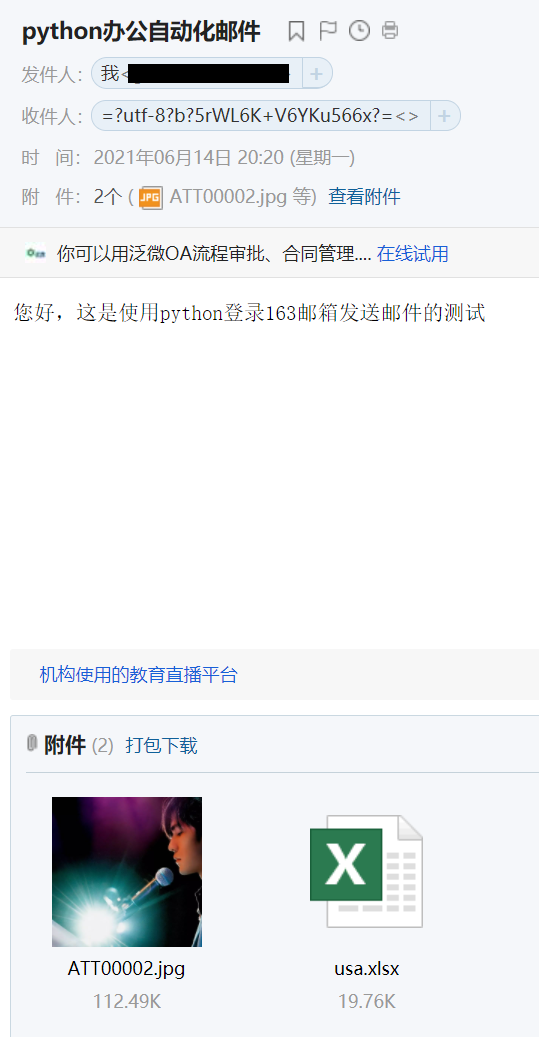

端午在家，花时间完成了第一节课，接下来要上班，只能忙里偷闲了，要尽量早完成，万一有什么事突然要忙呢。  
学了感觉又掌握了一些东西，还是得多学学，不然很容易忘记，这课程很不错，继续加油。